In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.utils import shuffle

In [3]:
n = 50
x = np.random.randn(2*n).reshape((n, 2))
x[:n/2, 0] = x[:n/2, 0] -15
x[n/2:, 0] = x[n/2:, 0] -5
x[:2, 0] = x[:2, 0] + 10
y = np.array([1] * (n/2) + [-1] * (n/2))

In [4]:
class OnlineOptimizer(object):
    def __init__(self, gamma = 0.1):
        #initialize weight & covariance
        self.weight = np.random.uniform(low = -1, high = 1, size = (3,))
        self.cov = np.eye(3)
        self.gamma = gamma
        
    def _add_bias(self, X):
        return np.append(X, [1])
    
    def dot(self, X):
        return np.matmul(self.weight.transpose(), X)
    
    def beta(self, X):
        tmp =  np.matmul(X.transpose(), self.cov)
        return np.matmul(tmp, X) + self.gamma
    
    def predict(self, X):
        dot = self.dot(X)
        return 1 if dot > 0 else -1
    
    def update(self, X, y):
        X_ = self._add_bias(X)
        dot = self.dot(X_)
        beta = self.beta(X_)
        #print(dot)
        #print(beta)
        #update weight & cov
        self.weight = self.weight + (y * max(0, 1 - y * dot) / beta) * np.matmul(self.cov, X_)
        self.cov = self.cov - np.matmul(np.matmul(self.cov , X_).reshape((3,1)), np.matmul(X_.transpose(), self.cov).reshape((1,3))) / beta
        #print(self.weight)
        #print(self.cov)

In [5]:
X, y = shuffle(x, y)
clf = OnlineOptimizer()
epochs = 100
for i in range(epochs):
    for X_, y_ in zip(X, y):
        clf.update(X_, y_)

In [6]:
clf.weight

array([-0.19515842, -0.02624338, -1.81540608])

(-5, 5)

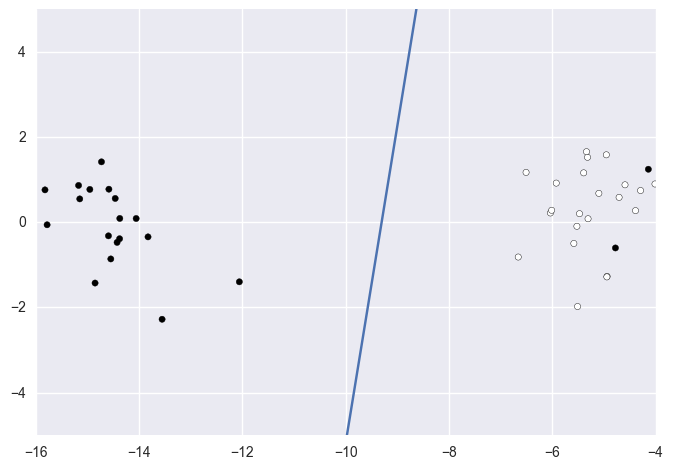

In [10]:
def clf_boundary(x):
    return (clf.weight[0] * x + clf.weight[2]) / clf.weight[1]

fig, ax = plt.subplots()

ax.scatter(X[:,0], X[:,1], c = y)
boundary = pd.Series(clf_boundary(np.arange(-15, -5, 0.5)), index = np.arange(-15, -5, 0.5))
boundary.plot(ax = ax)

ax.set_xlim(-16, -4)
ax.set_ylim(-5, 5)